In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Data/red_wine.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1:]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.svm import SVC
svc = SVC(gamma="scale")
svc.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
from sklearn.linear_model import PassiveAggressiveRegressor
pac = PassiveAggressiveRegressor(max_iter=50)
pac.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=50,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# print(mean_absolute_error(c, y_test))
# print(mean_squared_error(c, y_test))
# print(np.sqrt(mean_squared_error(c, y_test)))
# c = pac.predict(X_test)
# print(mean_squared_error(c, y_test))

In [17]:
models = [knn, lr, svc, dt, rf, pac, linr]
Loss = []

for model in models:
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_pred, y_test)
    Loss.append(loss)

print(Loss)

[0.615625, 0.503125, 0.446875, 0.684375, 0.320369375, 0.4569833930103301, 0.3844711978201242]


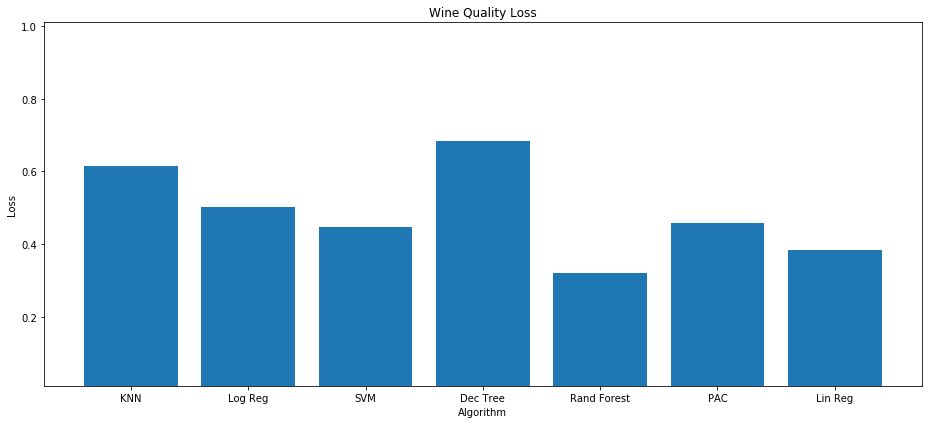

In [18]:
plt.figure(figsize=(13,6))
plt.bar(["KNN", "Log Reg", "SVM", "Dec Tree", "Rand Forest", "PAC", "Lin Reg"], Loss)
plt.ylim(0.01, 1.01)
plt.title("Wine Quality Loss")
plt.xlabel("Algorithm")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

In [19]:
print("Input Example: 10.3")
input_fixed_acidity = float(input("Fixed Acidity: "))

print("\nInput Example: 0.32")
input_volatile_acidity = float(input("Volatile Acidity: "))

print("\nInput Example: 0.45")
input_citric_acid = float(input("Citric Acid: "))

print("\nInput Example: 6.4")
input_residual_sugar = float(input("Residual Sugar: "))

print("\nInput Example: 0.073")
input_chlorides = float(input("Chlorides: "))

print("\nInput Example: 5.0")
input_free_sulfur_dioxide = float(input("Free Sulfur Dioxide: "))

print("\nInput Example: 13.0")
input_total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))

print("\nInput Example: 0.9976")
input_density = float(input("Density: "))

print("\nInput Example: 3.23")
input_ph = float(input("pH: "))

print("\nInput Example: 0.82")
input_sulphates = float(input("Sulphates: "))

print("\nInput Example: 12.6")
input_alcohol = float(input("Alcohol: "))

Input Example: 10.3
Fixed Acidity: 10.3

Input Example: 0.32
Volatile Acidity: 0.3

Input Example: 0.45
Citric Acid: 0.45

Input Example: 6.4
Residual Sugar: 6.4

Input Example: 0.073
Chlorides: 0.073

Input Example: 5.0
Free Sulfur Dioxide: 5.0

Input Example: 13.0
Total Sulfur Dioxide: 13.0

Input Example: 0.9976
Density: 0.9976

Input Example: 3.23
pH: 3.23

Input Example: 0.82
Sulphates: 0.82

Input Example: 12.6
Alcohol: 12.6


In [20]:
data_frame = [[input_fixed_acidity, input_volatile_acidity, input_citric_acid, input_residual_sugar, input_chlorides, input_free_sulfur_dioxide, input_total_sulfur_dioxide, input_density, input_ph, input_sulphates, input_alcohol]]
dataframe = pd.DataFrame(data_frame, columns=["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "ph", "sulphates", "alcohol"])
dataframe

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,10.3,0.3,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6


In [21]:
dataframe = scaler.transform(dataframe)

In [22]:
prediction_knn = knn.predict(dataframe)
prediction_lr = lr.predict(dataframe)
prediction_svm = svc.predict(dataframe)
prediction_dt = dt.predict(dataframe)
prediction_rf = rf.predict(dataframe)
prediction_pac = pac.predict(dataframe)
prediction_linr = linr.predict(dataframe)

In [23]:
print("Quality > 6.5 is Good, < 6.5 is Not Good")

print(f"Prediciton with K-Nearest Neighbors: {round(prediction_knn.item(),1)}")
print(f"Prediciton with Logistic Regression: {round(prediction_lr.item(),1)}")
print(f"Prediciton with Support Vector Machine: {round(prediction_svm.item(),1)}")
print(f"Prediciton with Decision Tree: {round(prediction_dt.item(),1)}")
print(f"Prediciton with Random Forest: {round(prediction_rf.item(),1)}")
print(f"Prediciton with Passive Aggresive: {round(prediction_pac.item(),1)}")
print(f"Prediciton with Linear Regression: {round(prediction_linr.item(),1)}")

Quality > 6.5 is Good, < 6.5 is Not Good
Prediciton with K-Nearest Neighbors: 7
Prediciton with Logistic Regression: 7
Prediciton with Support Vector Machine: 7
Prediciton with Decision Tree: 6.0
Prediciton with Random Forest: 6.7
Prediciton with Passive Aggresive: 6.5
Prediciton with Linear Regression: 6.9
